# Modelo con datos simulados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creamos unos datos de ejemplo

In [2]:
np.random.seed(42)
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.99 * np.random.randn(100)
y_act = 5 + 1.9 * x + res
y_pred = 5 + 1.9 * x

# Generación del DataFrame

In [3]:
data = pd.DataFrame(
    {
        "x": x,
        "y_act": y_act,
        "y_pred": y_pred
    }
)
data.head()

,x,y_act,y_pred
0,2.741785,8.808175,10.209392
1,1.154339,6.776806,7.193245
2,3.119221,10.587233,10.926521
3,5.307575,14.290137,15.084392
4,0.914617,6.578099,6.737771


# Media de los valores observados

In [4]:
y_mean = np.mean(y_act)
y_mean

7.37881058355748

# Representación de los valores observados, predicción y media

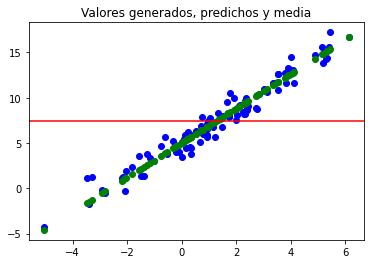

In [5]:
plt.title("Valores generados, predichos y media")
plt.scatter(x, y_act, color="blue")
plt.scatter(x, y_pred, color="green")
plt.axhline(y=y_mean, color="red", linestyle='-')

# Cálculo del SST, SSR, SSD y R<sup>2</sup>

<img src="img/img_954.png" width="250" height="250"/>

In [6]:
# Diferencia entre el promedio y la regresión
data["SSR"] = (data["y_pred"] - y_mean) ** 2
# Diferencia entre la regresión y el valor observado
data["SSD"] = (data["y_pred"] - data["y_act"]) ** 2
# Diferencia entre el valor observado y el valor medio
data["SST"] = (data["y_act"] - y_mean) ** 2

In [7]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,2.741785,8.808175,10.209392,8.012192,1.963409,2.043083
1,1.154339,6.776806,7.193245,0.034435,0.173421,0.362410
2,3.119221,10.587233,10.926521,12.586246,0.115116,10.293976
3,5.307575,14.290137,15.084392,59.375982,0.630840,47.766437
4,0.914617,6.578099,6.737771,0.410931,0.025495,0.641140


In [8]:
# Calculemos la suma de los cuadrados
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])
print("SSR = {0}, SSD = {1}, SST = {2}".format(SSR, SSD, SST))

SSR = 1842.3269612241031, SSD = 88.2959492474407, SST = 1820.5126133980953


In [9]:
R2 = SSR / SST
R2

1.0119825304507448

Hemos obtenido un valor para R<sup>2</sup> muy alto, próximo a 1. **Indica que el modelo es bastante bueno.**

<font color="red">**Tenemos que repasar este coeficiente de determinación porque debe estar entre 0 y 1 siempre**</font>

# Obteniendo la recta de regresión

In [10]:
# Obtención de la covarianza
# 1. Calculo la media de x que no la tenía
x_mean = np.mean(data["x"])

In [11]:
# 2. Obtengo los valores de alpha y beta
data["covarianza"] = (data["x"] - x_mean) * (data["y_act"] - y_mean)
data["varianza"] = (data["x"] - x_mean) ** 2
beta = sum(data["covarianza"]) / sum(data["varianza"])
alpha = y_mean - beta * x_mean
alpha, beta

(5.092448304766565, 1.8432701645325085)

In [12]:
# 3. Defino la recta de regresión y los valores predichos al DataFrame
data["y_model"] = alpha + beta * data["x"]
data.head()

,x,y_act,y_pred,SSR,SSD,SST,covarianza,varianza,y_model
0,2.741785,8.808175,10.209392,8.012192,1.963409,2.043083,2.146050,2.254207,10.146299
1,1.154339,6.776806,7.193245,0.034435,0.173421,0.362410,0.051799,0.007404,7.220207
2,3.119221,10.587233,10.926521,12.586246,0.115116,10.293976,6.028105,3.530031,10.842016
3,5.307575,14.290137,15.084392,59.375982,0.630840,47.766437,28.109685,16.542042,14.875742
4,0.914617,6.578099,6.737771,0.410931,0.025495,0.641140,0.260846,0.106124,6.778334


El modelo lineal obtenido por regresión es **y = 5.09 + 1.84 * x**

# Estadístico del coeficiente de correlación R<sup>2</sup>

<font color="red">**Tenemos que repasar este coeficiente de determinación porque debe estar entre 0 y 1 siempre**</font>

In [13]:
# Diferencia entre el promedio y la regresión
SSR = sum((data["y_model"] - y_mean) ** 2)
# Diferencia entre la regresión y el valor observado
SSD = sum((data["y_model"] - data["y_act"]) ** 2)
# Diferencia entre el valor observado y el valor medio
SST = sum((data["y_act"] - y_mean) ** 2)
print("SSR = {0}, SSD = {1}, SST = {2}".format(SSR, SSD, SST))

SSR = 1733.907793808726, SSD = 86.60481958936923, SST = 1820.5126133980953


In [14]:
R2 = SSR / SST
R2

0.9524283331233194

# Estadísticos importantes

Para plantear la existencia de una relación, debería probar que beta es distinto de cero en la expresión

* y = alpha + beta * x

Y podríamos plantear un contraste de hipótesis en el que la hipótesis nula sería que **beta = 0** y la hipótesis alternativa sería que **beta <> 0**.

<img src="img/img_955.png" width="550"/>

Esto será muy útil cuando tengamos varias variables predictoras, utilizaremos este contraste de hipótesis para decidir cuáles son las variables que explican realmente bien el modelo.

El estadístico que se utiliza para validar este contraste de hipótesis es el estadístico F (porque sigue una distribución F de Fischer).

<img src="img/img_956.png" width="550"/>

<img src="img/img_957.png" width="550"/>

El siguiente concepto es importante. Es imposible explicar 100% el comportamiento de nuestros datos con el modelo.

<img src="img/img_958.png" width="550"/>

# Error estándar de los residuos (RSE)

In [15]:
RSE = np.sqrt(SSD / (len(data) - 2))
RSE

0.9400652364975075

Ahora, este error medio deberíamos constrastarlo con los valores medios de nuestra varaible. Si recordamos la media ....

In [16]:
y_mean

7.37881058355748

Y hemos obtenido que el error medio era ....

In [17]:
RSE

0.9400652364975075

Si obtenemos el resultado en porcentaje vemos ....

In [18]:
RSE / y_mean

0.12740064619524116

**Es decir, tendremos un incremento del 12% de error debido al uso de este modelo.**

# El paquete statsmodel para regresión lineal

In [19]:
data = pd.read_csv("datasets/ads/Advertising.csv")  # Gasto en publicidad y resultado en ventas
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
import statsmodels.formula.api as smf

In [21]:
# Creemos el modelo lineal
lm = smf.ols(formula="Sales~TV", data=data).fit()  # Quiero predecir ventas en función de TV

In [22]:
# Veamos los parámetros obtenidos
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El intercept viene a ser la **a**. El otro valor sería el que acompaña a la variable predictora. Nuestro modelo lineal sería:

* Sales = 7.032594 + 0.047537 x TV

**Tenemos en cuenta que hemos asumido una relación lineal**. Con este modelo podemos concluir que una subida de 100 unidades de gasto en TV implicaría una subida de 4 unidades de ventas.

Todos estos valores **son estimados** y por tanto **tienen un p-valor asociado** con el que obtendremos la significancia estadística.

In [23]:
# Obtengamos los p-values
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Hemos obtenido unos p-valores muy muy pequeños, por tanto podemos recharzar la hipótesis nula de que los parámetros son cero (sin relación) y concluir con que **hay una relación entre las variables**.

Estudiemos ahora el **coeficiente de determinación** R<sup>2</sup>.

In [24]:
lm.rsquared

0.611875050850071

Existe una variante que es el **valor de R<sup>2</sup> ajustado** que se supone que va un poquito mejor. Lo ajusta según el número de valores observados.

In [25]:
lm.rsquared_adj

0.6099148238341623

# Obtención de todos los indicadores y estadísticos

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        18:38:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Utilización del modelo para predicción de ventas

In [27]:
sales_pred = lm.predict(data["TV"])
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

Ahora, **¿cómo de bueno es este modelo?**, hagamos un plot y comparemos con los valores reales

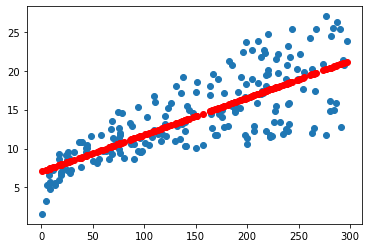

In [28]:
plt.scatter(data["TV"], data["Sales"])
plt.scatter(data["TV"], sales_pred, color="red")

# RSE

In [29]:
SSD = sum((data["Sales"] - sales_pred) ** 2)
RSE = np.sqrt(SSD / (len(data) - 2))
RSE

3.258656368650462

# Comparación de los residuos con el total de ventas

In [30]:
sales_mean = np.mean(data["Sales"])
sales_mean

14.022500000000003

In [31]:
error = RSE / sales_mean
error

0.23238768897489473

Podemos concluir que el modelo no explica el 23% de la variabilidad de los datos. **Tenemos el 23% de error**.

# Histograma de distribución de errores

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <a list of 10 Patch objects>)

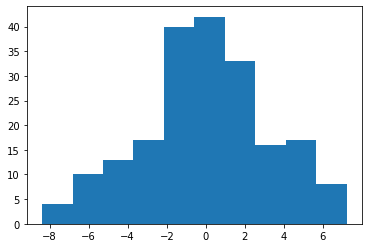

In [32]:
plt.hist(data["Sales"] - sales_pred)  # Distribución de errores respecto del modelo

Vemos que se distribuyen según una normal.

# Regresión lineal múltiple

Hasta ahora hemos utilizado una única variable para crear nuestro modelo y hemos obtenido que tenemos un 23% de error o de variabilidad de los datos que no es capaz de explicar. Ahora, para poder mejorar estos resultados, podemos utilizar las otras variables predictoras que hasta ahora no hemos tenido en consideración.

Aquí se nos plantean muchas posibilidades. Tenemos 3 posibles variables predictoras (TV, Radio y Prensa) para obtener las ventas estimadas. En total, 7 posibilidades, 2^k-1. La estrategía podría ser la siguiente:

* Comenzar con un modelo que aplique todas las variables predictorias.
* Quedarme con aquellas con p-valor menor y eliminar las que tienen un p-valor alto. 0.05 es un buen umbral para el p-valor.

Otra estrategia sería empezar con una variable y luego agregar nuevas poco a poco.

* Empezaríamos con la que tuviese un menor RSE.
* Luego agregaríamos otra y estudiaríamos su p-valor y el valor de R² ajustado.
* Si el p-valor es pequeño y el R² mejora, se agregaría esa nueva variable predictora al modelo.
* En otro caso se rechazaría.

In [33]:
# Agregamos una nueva variable al modelo y estudiamos el comportamiento
lm2 = smf.ols(formula="Sales~TV+Newspaper", data=data).fit()

Estudiemos los parámetros de este nuevo modelo lineal.

In [34]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [35]:
# Comprobemos los p-valores
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Vemos que los 3 p-valores que hemos encontrado son muy pequeños, por tanto parece que **estos tres parámetros son buenos**. La ecuación del modelo sería:

* Sales = 5.774948 + 0.046901 x TV + 0.044219 x Newspaper

In [36]:
# Estudiemos el valor de R² y de R² ajustado y estudiemos si ha mejorado o no respecto al anterior
lm.rsquared, lm.rsquared_adj, lm2.rsquared, lm2.rsquared_adj

(0.611875050850071, 0.6099148238341623, 0.6458354938293273, 0.6422399150864777)

Es claro que ha mejorado el indicador R².

In [37]:
# Hagamos unas predicciones para ver el resultado obtenido
sales_pred = lm2.predict(data[["TV", "Newspaper"]])
# Con el doble corchete indico que quiero un subdataset del dataset original
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

# Desviación estándar de los residuos

(array([ 5.,  8., 14., 22., 51., 47., 23., 18., 10.,  2.]),
 array([-8.6230898 , -6.91565958, -5.20822935, -3.50079912, -1.7933689 ,
        -0.08593867,  1.62149155,  3.32892178,  5.036352  ,  6.74378223,
         8.45121245]),
 <a list of 10 Patch objects>)

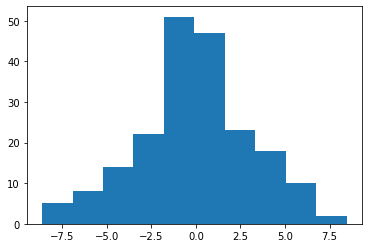

In [38]:
plt.hist(data["Sales"] - sales_pred)  # Distribución de errores respecto del modelo

Si lo comparamos con el gráfico anterior **veremos que ha mejorado**.

# RSE

In [39]:
SSD = sum((data["Sales"] - sales_pred) ** 2)
RSE = np.sqrt(SSD / (len(data) - 3))  # Resto 3 porque el número de variables predictoras es 2
RSE

3.1207198602528843

Antes teníamos un RSE de 3.25 y ahora de 3.12. Por tanto, **ha mejorado**. Pero no ha mejorado mucho.

In [40]:
error = RSE / sales_mean
error

0.22255089037282108

Dejaríamos de explicar un 22%

In [41]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           3.95e-45
Time:                        18:38:48   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ahora podríamos repetir el proceso pero en vez de añadir el periódico añadiríamos la inversión en radio. **Como esta variable tenía la segunda correlación más alta, veremos que mejora mucho más las predicciones**.

# Nuevo modelo de regresión

In [42]:
# Agregamos una nueva variable al modelo y estudiamos el comportamiento
lm3 = smf.ols(formula="Sales~TV+Radio", data=data).fit()
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [43]:
# Comprobemos los p-valores. Vemos que son mucho menores que antes.
lm3.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [44]:
# Estudiemos el valor de R² y de R² ajustado y estudiemos si ha mejorado o no respecto al anterior
lm2.rsquared, lm2.rsquared_adj, lm3.rsquared, lm3.rsquared_adj

(0.6458354938293273,
 0.6422399150864777,
 0.8971942610828956,
 0.8961505479974428)

In [45]:
# Hagamos unas predicciones para ver el resultado obtenido
sales_pred = lm3.predict(data[["TV", "Radio"]])
# Con el doble corchete indico que quiero un subdataset del dataset original
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

# Desviación estándar de los residuos

(array([ 1.,  0.,  1.,  2.,  7., 19., 24., 62., 61., 23.]),
 array([-8.79769966, -7.63464601, -6.47159236, -5.30853871, -4.14548506,
        -2.98243141, -1.81937776, -0.65632411,  0.50672953,  1.66978318,
         2.83283683]),
 <a list of 10 Patch objects>)

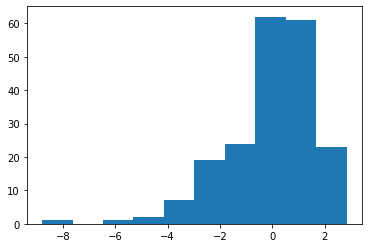

In [46]:
plt.hist(data["Sales"] - sales_pred)  # Distribución de errores respecto del modelo

# RSE

In [47]:
SSD = sum((data["Sales"] - sales_pred) ** 2)
RSE = np.sqrt(SSD / (len(data) - 3))  # Resto 3 porque el número de variables predictoras es 2
RSE

1.681360912508001

Antes teníamos un RSE de 3.12 y ahora de 1.68. Por tanto, **ha mejorado mucho**.

In [48]:
lm3.summary()  # Vemos un R² muy muy alto.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           4.83e-98
Time:                        18:38:48   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
error = RSE / sales_mean
error

0.11990450436855059

Ahora vemos que el modelo solo deja de explicar en torno al 12%. **Es mucho mejor**.

**¿Y si añadimos los 3?, ¿no obtendríamos un mejor resultado?**. Hacerlo como ejercicio y veremos que el p-valor para el Newspaper es terriblemente alto y el **intervalo de confianza incluye al cero**.

In [50]:
# Agregamos una nueva variable al modelo y estudiamos el comportamiento
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        18:38:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Si estudiamos el RSE veremos que sube**. Tiene un **parámetro más** y se obtiene **peor performance** del modelo.

# Multicolinealidad

Es la responsable de que el modelo se haya comportado peor incluyendo una variable más. Hace referencia a la correlación entre las variables predictoras. **Y si hay relación entre ellas afectará negativamente al modelo**.

Por ejemplo, podemos ver que el **Newspaper** está relacionado en cierto modo con la **Radio**. Hay estrategias para eliminar predictores que vamos a estudiar. Se trata del **cálculo del factor de inflación de la varianza**.

In [51]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# Cálculo del factor de la inflación de la varianza

Se trataría de utilizar la correlación existente entre las variables predictoras y poner una de ellas como combinación de las otras.

Calcularíamos R² y obtendríamos:

* VIF = 1 / (1 - R²)

Esto para todas y cada una de las variables predictoras. **Calculemos los tres VIF**.

* Lo **mejor** que podría pasar es que **VIF sea igual a 1**, querría decir que las variables **no tienen nada de correlación**.
* Si está entre 1 y 5 tendremos que hay relación pero aún así pueden formar parte del modelo de predicción.
* Si supera 5, las variables están correlacionadas y deben eliminarse del modelo.

In [52]:
# Newspaper ~ TV + Radio
lm_n = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
rsquared_n = lm_n.rsquared
VIF_n = 1 / (1 - rsquared_n)
VIF_n

1.1451873787239288

In [53]:
# TV ~ Newspaper + Radio
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF_tv = 1 / (1 - rsquared_tv)
VIF_tv

1.0046107849396502

In [54]:
# Radio ~ Newspaper + TV
lm_r = smf.ols(formula="Radio~TV+Newspaper", data=data).fit()
rsquared_r = lm_r.rsquared
VIF_r = 1 / (1 - rsquared_r)
VIF_r

1.1449519171055353

Por tanto, Newspaper y Radio tienen casi el mismo VIF. Por tanto, nos quedamos con el modelo nº3 que estudiamos

# Validación del modelo

Tenemos que ver cómo se comporta con distintos conjuntos de datos. Tenemos que asegurar que no estamos provocando **overfitting**.

## División del dataset en conjunto de entrenamiento y testing

In [55]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data[["TV", "Radio"]], data["Sales"], test_size=0.20, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(160, 40, 160, 40)

## Entrenamiento del modelo

Ahora entrenamos el modelo sólo con los datos de entrenamiento. Ojo, en este caso concatenamos porque necesitamos todos los datos juntos al utilizar statsmodel.

In [58]:
lm = smf.ols(formula="Sales~TV+Radio", data=pd.concat([X_train, y_train], axis=1)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     673.4
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           9.30e-78
Time:                        18:38:48   Log-Likelihood:                -306.72
No. Observations:                 160   AIC:                             619.4
Df Residuals:                     157   BIC:                             628.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0283      0.330      9.188      0.000       2.377       3.679
TV             0.0447      0.002     28.620      0.000       0.042       0.048
Radio          0.1907      0.009     21.396      0.000       0.173       0.208
==============================================================================
Omnibus:                       68.563   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.306
Skew:                          -1.638   Prob(JB):                     4.43e-55
Kurtosis:                       8.179   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validación del modelo

In [59]:
sales_pred = lm.predict(X_test)

Veamos cómo diverge esta predicción de los datos iniciales.

In [60]:
# Diferencia entre la regresión y el valor observado
SSD = sum((sales_pred - y_test) ** 2)
RSE = np.sqrt(SSD / (len(y_test) -2 -1))
RSE

1.841840445320886

Calculemos la proporción del error respecto a la media de los valores de testing.

In [61]:
sales_mean = np.mean(y_test)
error = RSE / sales_mean
error

0.1343183551738112

Una diferencia del 13%. No varía mucho respecto al modelo que entrenamos con todos los datos.

## Comparación de los modelos

<img src="img/img_960.png" width="650"/>

Generar un resumen con los datos obtenidos de los distintos estudios realizados.

# scikit-learn, selección de variables predictoras

In [62]:
from sklearn.feature_selection import RFE  # Recursive Feacture Elimination
from sklearn.svm import SVR  # Support Vector Machines, utilizaremos SVR para el modelo lineal

In [63]:
# Defino cuáles serán las variables predictoras
feature_cols = ["TV", "Radio", "Newspaper"]
# Divido el DataFrame en dos, el primero con las variables predictoras y el segundo con los labels
X = data[feature_cols]
y = data["Sales"]

In [64]:
# Defino un estimator indicando kernel = linear
estimator = SVR(kernel="linear")
# Defino el selector de features, indicando que quiero dos variables y que lo haga en un paso
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X, y) # Para que cree el modelo

In [65]:
# Obtengamos la lista de las predictoras
selector.support_

array([ True,  True, False])

Vemos que se han seleccionado las variables TV y Radio.

In [66]:
# Veamos el ranking de las variables
selector.ranking_

array([1, 1, 2])

# scikit-learn, modelo de regresión lineal

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
# Defino un DataFrame con las variables predictoras y entreno el modelo
X_pred = data[["TV", "Radio"]]
lm = LinearRegression()
lm.fit(X_pred, y)

LinearRegression()

In [69]:
# Obtengamos los coeficientes
lm.intercept_, lm.coef_

(2.9210999124051362, array([0.04575482, 0.18799423]))

In [70]:
# Valor de R²
lm.score(X_pred, y)

0.8971942610828956

# Modelos lineales con variables categóricas

Hasta ahora hemos visto que todas las variables eran numéricas (TV, Radio, Newspaper). Veamos ahora cómo tratar variables categóricas.

In [71]:
df = pd.read_csv("datasets/ecom-expense/Ecom Expense.csv")  # Registros financieros de un banco
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


Queremos preveer los gastos a final de mes. Necesitaremos crear variables dummies para el **Gender** y el **City Tier**.

## Obtención de variables dummies

In [72]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [73]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [74]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


## Incorporación de variables dummies al DataFrame

In [75]:
df = pd.concat([df.drop(["Gender", "City Tier"], axis=1), dummy_gender, dummy_city_tier], axis=1)
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,3254.160485,1,0,0,1,0


In [76]:
# Definamos las variables predictoras y los labels
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female",
                "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3"]
label_col = "Total Spend"
X = df[feature_cols]
y = df[label_col]

## Creación del modelo

In [77]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [78]:
lm.intercept_, lm.coef_

(3655.7294076906533,
 array([   0.15297825,    0.12372609,  -94.15779883,   94.15779883,
         119.6632516 ,  -16.67901801, -102.9842336 ]))

In [79]:
# Obtengamos qué coeficiente pertenece a cada feature
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.15297824609320512),
 ('Transaction Time', 0.12372608642619995),
 ('Gender_Female', -94.15779883032015),
 ('Gender_Male', 94.15779883032015),
 ('City_Tier 1', 119.66325160390109),
 ('City_Tier 2', -16.67901800799038),
 ('City_Tier 3', -102.98423359591071)]

## Valor de R²

In [80]:
lm.score(X, y)

0.19478920552885381

Si añadimos una nueva feature a nuestro modelo, por ejemplo **Record**, veremos que el valor de R² mejora una barbaridad. Hacerlo como ejercicio.

## Predicción del modelo y desviación típica de los residuos

In [81]:
total_spend_pred = lm.predict(X)

Veamos cómo diverge esta predicción de los datos iniciales.

In [82]:
# Diferencia entre la regresión y el valor observado
SSD = sum((total_spend_pred - y) ** 2)
RSE = np.sqrt(SSD / (len(y) -7 -1))  # Tenemos 7 variables predictoras
RSE

2516.067185566445

Calculemos la proporción del error respecto a la media de los valores de testing.

In [83]:
sales_mean = np.mean(y)
error = RSE / sales_mean
error

0.4082419544318219

Una diferencia del 40%.

(array([185.,   9., 182., 100., 120., 234., 212., 256., 385., 679.]),
 array([-5865.14931202, -4985.21601994, -4105.28272786, -3225.34943578,
        -2345.41614371, -1465.48285163,  -585.54955955,   294.38373253,
         1174.31702461,  2054.25031669,  2934.18360876]),
 <a list of 10 Patch objects>)

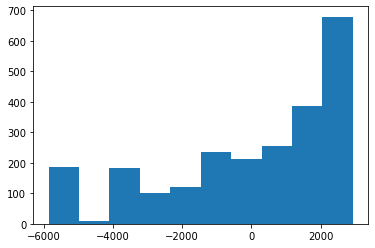

In [84]:
plt.hist(total_spend_pred - y)

# Transformar las variables en relaciones no lineales

A veces tendremos relaciones que no serán lineales. Serán exponenciales, logarítmicas, .... La forma rápida de ver esto sería mediante un **scatter plot**. Hagamos un ejemplo de consumo de combustible y potencia del coche.

In [85]:
data_auto = pd.read_csv("datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Text(0, 0.5, 'Consumo (millas por galeón)')

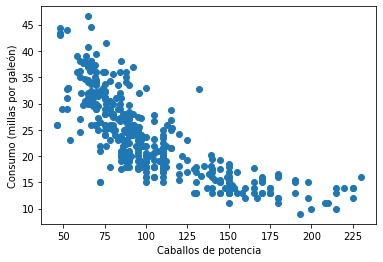

In [86]:
plt.scatter(data_auto["horsepower"], data_auto["mpg"])
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galeón)")

## Modelo de regresión lineal

In [87]:
# Estudiemos primero si hay valores nulos para eliminarlos
data_auto.info()  # Vemos que hay valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [88]:
# Eliminamos los valores nulos
data_auto = data_auto.dropna(axis=0, how="any")
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [89]:
X = data_auto[["horsepower"]]
y = data_auto["mpg"]

In [90]:
lm = LinearRegression()
lm.fit(X, y)
y_predict = lm.predict(X)

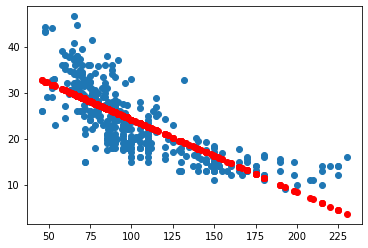

In [91]:
plt.scatter(X, y)
plt.scatter(X, y_predict, color="red")

In [92]:
# Estudiemos R²
lm.score(X, y)

0.6059482578894348

In [93]:
# Diferencia entre la regresión y el valor observado
SSD = sum((y_predict - y) ** 2)
RSE = np.sqrt(SSD / (len(y) -1 -1))  # Tenemos 1 variable predictora
y_mean = np.mean(y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(9385.91587193242, 4.90575691954594, 23.44591836734694, 0.2092371406691483)

Obtenemos un error del 20% que podemos mejorar.

# Modelo de regresión cuadrático

* mpg = a + b * horsepower²

In [94]:
X = data_auto[["horsepower"]] ** 2

In [95]:
lm.fit(X, y)
y_predict = lm.predict(X)

In [96]:
lm.score(X, y)

0.5073670089832611

In [97]:
# Estudiemos los errores
SSD = sum((y_predict - y) ** 2)
RSE = np.sqrt(SSD / (len(y) -1 -1))  # Tenemos 1 variable predictora
y_mean = np.mean(y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(11734.021995832665, 5.485183304753855, 23.44591836734694, 0.23395045648512763)

Pues tenemos que el error se incrementa un poco más. **Estudiemos otra solución**.

# Modelo de regresión lineal y cuadrático

* mpg = a + b * horsepower + c * horsepower²

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [99]:
poly = PolynomialFeatures(degree=2)

In [100]:
X = poly.fit_transform(data_auto[["horsepower"]])
lm.fit(X, y)
y_predict = lm.predict(X)

In [101]:
lm.score(X, y)  # Ha subido un poquito más, sube el R²

0.6875590305127517

Podríamos probar varios grados, establecer un loop y estudiar si mejora el R²

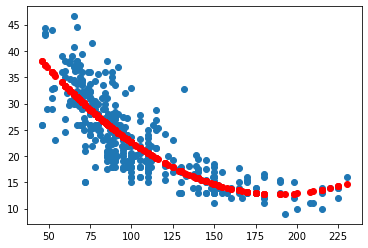

In [102]:
plt.scatter(data_auto[["horsepower"]], y)
plt.scatter(data_auto[["horsepower"]], y_predict, color="red")

**Parece que hemos obtenido un mejor modelo**.

# Consideraciones finales

<img src="img/img_971.png" width="550"/>

<img src="img/img_972.png" width="650"/>

<img src="img/img_973.png" width="650"/>

<img src="img/img_974.png" width="650"/>

<img src="img/img_975.png" width="550"/>